# Machine Learning Project - Ames Housing Data

Ames, Iowa is the college town of **Iowa State University**. The Ames housing dataset consists of about $2500$ house sale records between $2006-2010$. Detailed information about the house attributes, along with the sale prices, is recorded in the dataset. The goal of the project is to:
- perform descriptive data analysis to gain business (i.e. housing market) insights
- build descriptive machine learning models to understand the local housing market.
- build predictive machine learning models for the local house price prediction.

A subset of the **Ames** dataset is hosted on [**Kaggle**](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) as an entry-level regression competition. You may visit their site for some information on the meanings of its data columns (the data dictionary). In this notebook, we will describe various project ideas related to this data.


## The Project Workflow

- Starting with in-depth data analysis (mandatory) and data pre-processing, your team can choose to specialize in either:
     - $100\%$ descriptive modeling on home prices, or
     - say $40\%$ descriptive modeling and $60\%$ predictive modeling tasks on home prices.
     - It's OK to focus on other areas, but these areas must align with your end-goal in your job-search.


- Tools you are expected to use:
   - **Data analysis and missing value imputation**: **pandas**, **dplr**, and the accompanying visualization tools, some multiple linear regression or logistic regression.
   - **Descriptive models**: feature selection, feature engineering, multiple linear regression, Python statsmodels or their R couterpart, penalized linear regression, stepwise regression (**AIC**, **BIC**, etc.), some gridsearch, KNN, SVR, Random Forest, Gradient Boosting, and potentially other models.
   - **Predictive models**: feature selection, feature engineering, gridsearchCV, multiple/penalized linear regression, gridsearch, Random Forest, Gradient Boosting, and potentially other models.


You can use machine learning models beyond those we list above, but don't make these optional models your first priority. Doing this would limit your time spent on the more fundamental part of the project. This is not wise!

The art of **feature engineering** includes generating new features, or selecting optimal features to feed into the machine learning models. If your goal is to improve accuracy, then the **optimal** features would mean the feature combination that offers high predictive accuracy. However, if your goal is to fit an **optimal** descriptive model for the purpose of improving business efficiency/profitability, the most accurate model might not give you the insights you want. As a modeler, you need to gauge which is most appropriate based on your objectives.


Clever ideas for **feature generation** are often inspired by high quality data analysis. Thus, we will suggest a few research questions to point you in the right direction. Chronologically, your team should work on data analysis and modeling simultaneously. Do **not** wait to start modelling until after you complete your data analysis phase, you will be pressed for time.

# Who we are 

### We are a Housing Market Consultants hired by a construction company  to research which ‘cosmetic’ features add the most value to a house.
:e were hired by a construction company to determine which ‘cosmetic’ features added the most value to the sale price of a house. The construction company is looking to buy old houses and remodel them. They are asking us to determine which features (limited to cosmetic features) can add the most value to the house. For example, a kitchen in excellent conditions, a finished livable basement, tiled roof, brick exterior, etc… The construction company is not interested in the number of rooms, size of the house, number of floors, etc…They are interested on updating the ‘look’ of the house and are trying to find out how much work should go into it. For example, if a finished basement does not make any difference in the price of the house then they will only clean it, and not try to make livable.


# 1. Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

import math

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from IPython.display import display


In [3]:

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [45]:
housing = pd.read_csv('./data/Ames_HousePrice.csv', index_col=0)
housing.shape
# pd.set_option('display.max_columns', 600)

(2580, 81)

In [ ]:
housing.columns

In [46]:
pd.set_option('display.max_columns', 600)

In [6]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


# 2. EDA 

### 2.1 Drop ID duplicated values

In [47]:
# drop id
housing.drop('PID',axis=1, inplace=True)

In [48]:
# found 1 duplicate row
housing[housing.duplicated()]
housing.drop_duplicates(inplace=True) # duplicate row removed

In [49]:
# duplicate row
housing[housing.duplicated()]

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [137]:
housing.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,856,126000,30,RL,nan,7890,Pave,NaN,Reg,Lvl,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,1049,139500,120,RL,42.000,4235,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,1001,124900,30,C (all),60.000,6060,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,1039,114000,70,RL,80.000,8146,Pave,NaN,Reg,Lvl,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,1665,227000,60,RL,70.000,8400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


## 2.2 chek outlier and normalization

In [214]:
#  devide into numerical/ categorical.

quantitative = [f for f in housing.columns if housing.dtypes[f] != 'object']
quantitative.remove('SalePrice')
qualitative = [f for f in housing.columns if housing.dtypes[f] == 'object']

In [ ]:
# numeric features ==> check nomarlity
f_n = pd.melt(housing, value_vars=quantitative)
f_n

In [ ]:
g = sns.FacetGrid(f_n , col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [ ]:
# add categorical - multiple  f_C

Many features do not have a strong relationship with Sale Price, such as ‘Year Sold’. However, a few variables, like overall quality and lot square footage are highly correlated with Sale Price.

In [205]:
# check outlier

Text(0.5, 6.799999999999994, 'Living Area')

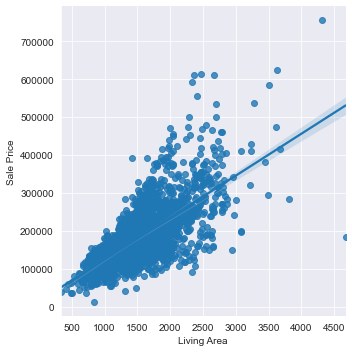

In [476]:
sns.lmplot(data = housing, x = "GrLivArea", y = "SalePrice") 
plt.ylabel("Sale Price")
plt.xlabel("Living Area")

In [ ]:
sns.lmplot(data = housing, x = "GrLivArea", y = "SalePrice") 
plt.ylabel("Sale Price")
plt.xlabel("Living Area")

{'whiskers': [<matplotlib.lines.Line2D at 0x269f0b6a790>,
 'caps': [<matplotlib.lines.Line2D at 0x269f1df4b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x269f1d7f970>],
 'medians': [<matplotlib.lines.Line2D at 0x269f2906490>],
 'fliers': [<matplotlib.lines.Line2D at 0x269f2906d00>],
 'means': []}

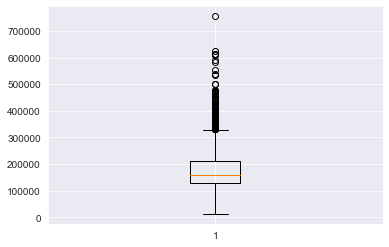

In [54]:
#now to look at saleprice
plt.boxplot(housing["SalePrice"])

In [209]:
## check sale price distribution  : Normalization

In [477]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore scikit/sns warnings

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #limit float outputs to 3


 mu = 178053.44 and sigma = 75030.43



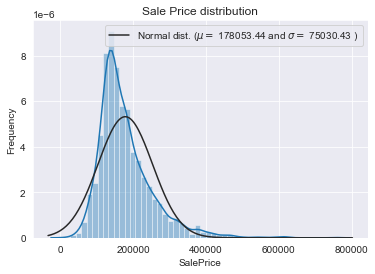

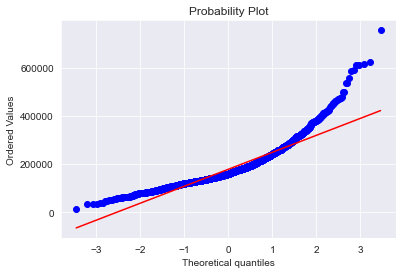

In [478]:
sns.distplot(housing['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(housing['SalePrice']) #get normal dist parameters
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best') #plot distribution details
plt.ylabel('Frequency')
plt.title('Sale Price distribution')

fig = plt.figure() #qqplot
res = stats.probplot(housing['SalePrice'], plot=plt)
plt.show() #data is heavily right skewed, can correct

In [503]:
#apply log(1+x) to sale price
housing["SalePrice"] = np.log(housing["SalePrice"])

# return: np.exp(housing["SalePrice"])


 mu = 12.01 and sigma = 0.39



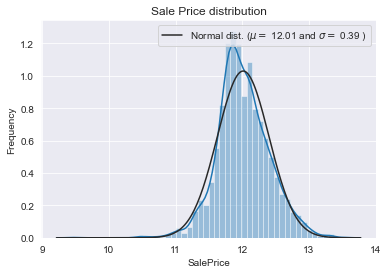

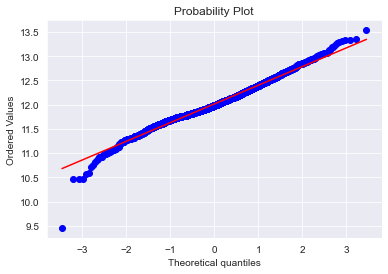

In [502]:
sns.distplot(housing['SalePrice'], fit=norm);

(mu, sigma) = norm.fit(housing['SalePrice']) #get normal dist parameters
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best') #plot distribution details
plt.ylabel('Frequency')
plt.title('Sale Price distribution')

fig = plt.figure() #qqplot
res = stats.probplot(housing['SalePrice'], plot=plt)
plt.show() #skew is gone

y_train = housing["SalePrice"] #assign normalised y

# 3.3 missing value imputation

In [50]:
# Alley : data description says NA means "no alley access"
housing.loc[:, "Alley"] = housing.loc[:, "Alley"].fillna("None")

In [51]:
# BedroomAbvGr : NA most likely means 0
housing.loc[:, "BedroomAbvGr"] = housing.loc[:, "BedroomAbvGr"].fillna(0)

In [52]:
# BsmtQhousinghousingual etc : data description says NA for basement features is "no basement"
housing.loc[:, "BsmtQual"] = housing.loc[:, "BsmtQual"].fillna("0")
housing.loc[:, "BsmtCond"] = housing.loc[:, "BsmtCond"].fillna("0")
housing.loc[:, "BsmtExposure"] = housing.loc[:, "BsmtExposure"].fillna("No")
housing.loc[:, "BsmtFinType1"] = housing.loc[:, "BsmtFinType1"].fillna(0)
housing.loc[:, "BsmtFinType2"] = housing.loc[:, "BsmtFinType2"].fillna(0)
housing.loc[:, "BsmtFullBath"] = housing.loc[:, "BsmtFullBath"].fillna(0)
housing.loc[:, "BsmtHalfBath"] = housing.loc[:, "BsmtHalfBath"].fillna(0)
housing.loc[:, "BsmtUnfSF"] = housing.loc[:, "BsmtUnfSF"].fillna(0)
housing.loc[:, 'TotalBsmtSF'] = housing.loc[:, 'TotalBsmtSF'].fillna(0)
housing.loc[:, 'BsmtFinSF1'] = housing.loc[:, 'TotalBsmtSF'].fillna(0)
housing.loc[:, 'BsmtFinSF2'] = housing.loc[:, 'TotalBsmtSF'].fillna(0)

In [53]:
# CentralAir : NA most likely means No
housing.loc[:, "CentralAir"] = housing.loc[:, "CentralAir"].fillna("N")

# Condition : NA most likely means Normal
housing.loc[:, "Condition1"] = housing.loc[:,"Condition1"].fillna("Norm")
housing.loc[:, "Condition2"] = housing.loc[:, "Condition2"].fillna("Norm")

# EnclosedPorch : NA most likely means no enclosed porch
housing.loc[:, "EnclosedPorch"] = housing.loc[:, "EnclosedPorch"].fillna(0)

# External stuff : NA most likely means average
housing.loc[:, "ExterCond"] = housing.loc[:, "ExterCond"].fillna("TA")
housing.loc[:, "ExterQual"] = housing.loc[:, "ExterQual"].fillna("TA")
housing.loc[:, "Exterior1st"] = housing.loc[:, "Exterior1st"].fillna("VinylSd")
housing.loc[:,"Exterior2nd"] = housing.loc[:,"Exterior2nd"].fillna("VinylSd")


In [54]:
# Fence : data description says NA means "no fence"
housing.loc[:, "Fence"] = housing.loc[:, "Fence"].fillna("No")

# FireplaceQu : data description says NA means "no fireplace"
housing.loc[:, "FireplaceQu"] = housing.loc[:, "FireplaceQu"].fillna(0)
housing.loc[:, "Fireplaces"] = housing.loc[:, "Fireplaces"].fillna(0)

# Functional : data description says NA means typical
housing.loc[:, "Functional"] = housing.loc[:, "Functional"].fillna("Typ")

In [55]:
# GarhousingageType etc : data description says NA for garage features is "no garage"
housing.loc[:, "GarageType"] = housing.loc[:, "GarageType"].fillna("No")
housing.loc[:, "GarageFinish"] = housing.loc[:, "GarageFinish"].fillna(0)
housing.loc[:, "GarageQual"] = housing.loc[:, "GarageQual"].fillna(0)
housing.loc[:, "GarageCond"] = housing.loc[:, "GarageCond"].fillna("No")
housing.loc[:, "GarageCars"] = housing.loc[:, "GarageCars"].fillna(0)
housing.loc[:, "GarageArea"] = housing.loc[:, "GarageArea"].fillna(0)

In [56]:
# HalfBath : NA most likely means half baths above grade
housing.loc[:, "HalfBath"] = housing.loc[:, "HalfBath"].fillna(0)

# HeatingQC : NA most likely means typical
housing.loc[:, "HeatingQC"] = housing.loc[:, "HeatingQC"].fillna("TA")

# KitchenAbvGr : NA most likely meanshousing 0
housing.loc[:, "KitchenAbvGr"] = housing.loc[:, "KitchenAbvGr"].fillna(0)

#kithousingchenQual : NA most likely means typical
housing.loc[:, "KitchenQual"] = housing.loc[:, "KitchenQual"].fillna("TA")


In [57]:
# LotShape : NA most likely means regular
# MasVnrType : NA most likely means no veneer
housing.loc[:, "MasVnrType"] = housing.loc[:, "MasVnrType"].fillna("None")
housing.loc[:, "MasVnrArea"] = housing.loc[:, "MasVnrArea"].fillna(0)

# MiscFeature : data description says NA means "no misc feature"
housing.loc[:, "MiscFeature"] = housing.loc[:, "MiscFeature"].fillna("No")
housing.loc[:, "MiscVal"] = housing.loc[:, "MiscVal"].fillna(0)

# OpenPorchSF : NA most likely means no open porch
housing.loc[:, "OpenPorchSF"] = housing.loc[:, "OpenPorchSF"].fillna(0)


In [58]:
# PavedDrive : NA most likely means not paved
housing.loc[:, "PavedDrive"] = housing.loc[:, "PavedDrive"].fillna("N")

# PoolQC : data description says NA means "no pool"
housing.loc[:, "PoolQC"] = housing.loc[:, "PoolQC"].fillna("No")
housing.loc[:, "PoolArea"] = housing.loc[:, "PoolArea"].fillna(0)

# SaleCondition : NA most likely means normal sale
# ScreenPorch : NA most likely means no screen porch
housing.loc[:, "ScreenPorch"] = housing.loc[:, "ScreenPorch"].fillna(0)


In [59]:
# TotRmsAbvGrd : NA most likely means 0
housing.loc[:, "TotRmsAbvGrd"] = housing.loc[:, "TotRmsAbvGrd"].fillna(0)

# Utilities : NA most likely means all public utilities
housing.loc[:, "Utilities"] = housing.loc[:, "Utilities"].fillna("AllPub")

# WoodDeckSFF : NA most likely means no wood deck
housing.loc[:, "WoodDeckSF"] = housing.loc[:, "WoodDeckSF"].fillna(0)

In [60]:
housing['GarageYrBlt'].fillna(0, inplace=True)

In [ ]:
housing.loc[:, housing.isna().any()]

In [71]:
from sklearn.impute import KNNImputer
# Use Knn Imputation for Missing Values
# Variable = LotFrontage
imputer = KNNImputer(n_neighbors=round(math.sqrt(len(housing)))) # k -> square root of the number of observations
imputed = imputer.fit_transform(housing.select_dtypes(include='number')) # calculate values with limited columns
housing_imputed = pd.DataFrame(imputed, columns=housing.select_dtypes(include='number').columns) # impute dataset

In [72]:
housing_imputed['LotFrontage'] = round(housing_imputed['LotFrontage']) # round values to match existing values

In [ ]:
# confirm the distribution of 'LotFrontage' did not change significantly
sns.distplot(housing['LotFrontage'], hist=False)
sns.distplot(housing_imputed['LotFrontage'], hist=False)

In [73]:
# Add imputed values to original dataset
housing['LotFrontage'] = housing_imputed['LotFrontage']

In [376]:
# Electrical -> Replacing missing na with SBrkr (every other house built on 
# same year has Standard Circuit Breakers & Romex (SBrkr))
# housing['Electrical'].fillna("SBrkr", inplace=True)

In [ ]:
housing["Electrical"] = housing["Electrical"].fillna("SBrkr") #replace with most common value
housing["Electrical"].value_counts()

In [240]:
# float into int

In [64]:
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype("Int64")
housing['GarageCars'] = housing['GarageCars'].astype("Int64")
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype("Int64")
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype("Int64")

In [ ]:
housing.select_dtypes(include ='float64') 

In [ ]:
# Garage built year is not house built year
housing[(housing['YearBuilt']>housing['GarageYrBlt']) & (housing['GarageArea']>0)][['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold','GarageArea','GarageType']]

In [66]:
# Updated GarageYrBlt with YearBuilt when the GarageYrBlt is before the house YearBuilt
new_years = pd.DataFrame(housing[(housing['YearBuilt']>housing['GarageYrBlt']) & (housing['GarageArea']>0)]['YearBuilt'])
new_years.columns = ['GarageYrBlt']
housing.update(new_years)

In [67]:
housing1 = housing 
housing1.to_csv('./data/housing1.csv')

## 3.4 orninal  features imputation

In [ ]:
# ordinal variables imputation
# External features
housing.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.LotShape.replace({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}, inplace=True)
housing.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3, 'Reg':4}, inplace=True)
housing.PavedDrive.replace({'P':1,'Y':2}, inplace=True)
housing.Fence.replace({'MnWw':1,'GdWo':2 ,'MnPrv':3, 'GdPrv':4}, inplace=True)

# Basement features
housing.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.BsmtQual.replace({'Po':1 ,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.BsmtFinType1.replace({'No':0,'Unf':1,'LwQ':2 ,'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
housing.BsmtFinType2.replace({'No':0,'Unf':1,'LwQ':2 ,'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)


# Garage Features
housing.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)
housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.GarageCond.replace({'Po':1,'Fa':2 ,'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Fireplace features
housing.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Heating features
housing.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen features
housing.KitchenQual.replace({'Po':1,'Fa':2 ,'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [74]:
# NaN values have a meaning
temp = pd.DataFrame(housing.isna().sum())
temp[temp[0]>0].sort_values(0, ascending=False)

,0


In [75]:
# converting "NA" to zero in the GarageYrBlt column
housing['GarageYrBlt'][housing['GarageYrBlt']=="NA"]# = 0

Series([], Name: GarageYrBlt, dtype: object)

In [76]:
housing.Utilities.unique()

array(['AllPub', 'NoSewr'], dtype=object)

In [77]:
# set the following columns to object
housing['MSSubClass'] = housing['MSSubClass'].astype(object)
housing['MoSold'] = housing['MoSold'].astype(object)


In [78]:
# set the following columns to int
housing['BsmtCond'] = housing['BsmtCond'].astype(int)
housing['BsmtQual'] = housing['BsmtQual'].astype(int)
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype(int)
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype(int)
housing['GarageQual'] = housing['GarageQual'].astype(int)
housing['LotShape'] = housing['LotShape'].astype(int)
housing['LotShape'] = housing['LotShape'].astype(int)

In [79]:
housing.to_csv('./data/housing_cleaned.csv') 

In [80]:
# Categorical variables --> dummified
# change object to numerical " "
categorical_features = [f for f in housing.columns if housing.dtypes[f] == 'object']

In [86]:
housing[categorical_features].columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [87]:
housing_new = pd.get_dummies(data = housing, columns = categorical_features, drop_first=True)

In [88]:
housing_new.head()

,GrLivArea,SalePrice,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageYrBlt_1895.0,GarageYrBlt_1900.0,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1917.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1943.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951

In [85]:
housing_new.to_csv('./data/housing_new.csv') 

## EDA

In [ ]:
# Basement 
'BsmtQual', 'BsmtCond','BsmtFinType1', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF'

#Outside of house 
'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea'

#Overall
'OverallQual', 'OverallCond', 'PavedDrive', 'Fence', 'RoofStyle', 'RoofMatl'
'GarageFinish', 'GarageQual', 'GarageCond',

# Inside House 
'HeatingQC', 'CentralAir', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'LowQualFinSF'
 
# y = beta0 + beta1*X1 + beta2*X2 + beta3*X3 + beta4*X4 ...+ betan*Xn(Exterior Quality)

In [ ]:
# check basement variable value count
sns.countplot(data = housing, x = 'MSZoning')

In [ ]:
# Basement 
'BsmtQual', 'BsmtCond',, 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF'

# ordinal variable
# : Ordinal data as clear ordering such as three settings on a toaster (high medium and low). A frequency table (count of each category) is the common statistic for describing categorical data of each variable, and a bar chart or a waffle chart (shown below) are two visualizations which can be used.
# missing data or check associated data
# 

In [ ]:
Reading the description of each basement feature, we can see that:

Basement finished, unfinished, and total square feet are related in the following formula: TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF

BsmtFinType1 and BsmtFinSF1 might be related. We may predict rating of basement finished area (type 1) from its finished square feet.

BsmtFinType2 and BsmtFinSF2 might be related. We may predict rating of basement finished area (type 2) from its finished square feet.

Let’s first make sure that all basement areas are correct according to the abovementioned formula.

In [ ]:
sum( allSet$TotalBsmtSF != (allSet$BsmtFinSF1 + allSet$BsmtFinSF2 + allSet$BsmtUnfSF))

In [ ]:
All basement areas numbers are correct and according to the formula.

We have one house (333) whose BsmtFinType2 value is missing while its BsmtFinSF2 is 479 square feet. Let’s see the distribution of all BsmtFinType2 values versus BsmtFinSF2.

In [ ]:
# check all houses having non-zero BsmtFinSF2 versus their BsmtFinType2
missFinSF2 <- bsmtNa$BsmtFinSF2[is.na(bsmtNa$BsmtFinType2)]
bsmt2 <- allSet[allSet$BsmtFinSF2 >0 & !is.na(allSet$BsmtFinType2), c("BsmtFinSF2", "BsmtFinType2")]
bsmt2 %>% ggplot(aes(x = BsmtFinType2, y = BsmtFinSF2))+
                geom_boxplot()+
                geom_hline(yintercept = missFinSF2, color = "red")

In [ ]:
# calculate medians of finished square feet for each bsmt finish type 2
medSF <- bsmt2 %>% 
        group_by(BsmtFinType2) %>% 
        summarize(median = median(BsmtFinSF2))
medSF

In [ ]:
Let’s impute the missing rating of basement finished area (type2) based on the nearest median of square feet for the available type2 ratings.

In [ ]:
For basement exposure (BsmtExposure), we have 3 missing values. Let’s see if there’s any relationship between basement types and exposure.

In [ ]:
Now, we are left with missing values in basement quality and basement condition. Let’s see if there’s some relationship between basement quality (which refers to its height) and the exposure.

In [238]:
# Write cleaned dataset to csv file
housing.to_csv('./data/Price_Data_cleaned.csv', index=False)

In [229]:
#check for skew in numerical or ordered categorical variables : 
skewed_features = housing[quantitative ].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness

# skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed

,Skew
MiscVal,21.260
PoolArea,19.870
LowQualFinSF,13.242
LotArea,13.147
3SsnPorch,11.814
KitchenAbvGr,4.525
EnclosedPorch,4.053
ScreenPorch,3.992
BsmtFinSF2,3.985
BsmtHalfBath,3.787


Interpreting correlation-heatmap to understand some feature-points visually looking at the correlation number
'OverallQual', 'GrLivArea' and 'TotalBsmtSF' have strong correlation with 'SalePrice'.

While 'GarageCars' and 'GarageArea' also have strong correlation, but they are mostly mutually dependent i.e. they are NOT linearly independent of each other, i.e. there is a high-multicollinearity (0.88 as we can see in the figure) between them. Because, the number of cars that fit into the garage is dependent of the garage area. Hence, we just need one of these variables in our analysis (we can decide to keep 'GarageCars' as its correlation with 'SalePrice' is higher).

Same mutual dependence applies to the two features 'TotalBsmtSF' and '1stFloor' . We will take only 'TotalBsmtSF' in our feature-engineering.
AND ALSO 'TotRmsAbvGrd' and 'GrLivArea', and we will only take 'GrLivArea'
So from the below array of top correlated features lets make our selection

In [186]:
# check pairwise correlation of all column
corr = housing.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790661
GrLivArea        0.719980
1stFlrSF         0.642623
GarageCars       0.638640
GarageArea       0.635029
TotalBaths       0.621621
YearBuilt        0.544569
FullBath         0.535175
YearRemodAdd     0.514720
MasVnrArea       0.498513
TotRmsAbvGrd     0.490206
Fireplaces       0.488173
BsmtFinSF1       0.460778
WoodDeckSF       0.333332
OpenPorchSF      0.306629
BsmtFullBath     0.290867
HalfBath         0.285861
LotArea          0.274427
2ndFlrSF         0.263115
GarageYrBlt      0.245690
LotFrontage      0.177141
TotalBsmtSF      0.168118
BsmtUnfSF        0.168118
BedroomAbvGr     0.151924
ScreenPorch      0.121392
3SsnPorch        0.031269
PoolArea         0.030849
BsmtFinSF2       0.022545
MoSold           0.012725
YrSold          -0.001261
MiscVal         -0.018869
LowQualFinSF    -0.030827
BsmtHalfBath    -0.033766
MSSubClass      -0.084574
OverallCond     -0.101123
KitchenAbvGr    -0.113962
EnclosedPorch   -0.123209
Name: SalePr

In [ ]:
# check categorical features

In [187]:
categorical_features = housing.select_dtypes(include = ["object"]).columns
numerical_features = housing.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

In [191]:
train_corr <- cor(trainScaled[ ,predictors])
train_high_corr_v <- findCorrelation(train_corr, cutoff=.8)
train_low_corr <- trainScaled[ ,-c(train_high_corr_v)]
trainCleaned <- train_low_corr
rm(train_low_corr)
print(paste0("Number of more than 70% correlated columns : ", length(train_high_corr_v)))

SyntaxError: invalid syntax (<ipython-input-191-2c126f8b3eed>, line 1)

In [107]:
housing_num = housing[numerical_features]
housing_num[skewed_features] = np.log1p(housing_num[skewed_features])

In [188]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = housing_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
housing_num[skewed_features] = np.log1p(housing_num[skewed_features])

NameError: name 'housing_num' is not defined

In [185]:
skewed_features = skewness.index
skewed_features 

NameError: name 'skewness' is not defined

In [134]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)


In [135]:
# Standardize numerical features
stdSc = StandardScaler()
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])

C:\Users\magnolia00\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\magnolia00\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [140]:
#lasso model..

In [139]:
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]
    
my_predictions = {}
my_pred = None
my_actual = None
my_name = None

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()
    
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X , y)
    pred = lasso.predict(X_test)
    add_model('Lasso(alpha={})'.format(alpha), pred, y_test)
plot_all()

ValueError: could not convert string to float: 'Pave'

In [ ]:
#model_lasso = Lasso(alpha=33)
model_lasso.fit(X,y)
y_predict_lasso = model_lasso.predict(X_test_split)

mse_linear_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_predict_lasso))
print('MSE of Lasso Regression is ', mse_linear_lasso)

# Log Error
mse_log_linear_lasso = np.sqrt(mean_squared_log_error(y_test, y_predict_lasso))
print('MSE Log of Lasso Regression is ', mse_log_linear_lasso)

In [71]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [88]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [91]:
train = housing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Define error measure for official scoring: RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv =10))
    return(rmse)

def rmse_cv_test(model):
    rmse = np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [ ]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1])
lasso.fit(X_train, y_train)
alpha = lasso.alpha_

lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4])
lasso.fit(X_train, y_train)
alpha = lasso.alpha_

y_train_rdg = lasso.predict(X_train)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [94]:

alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    add_model('Lasso(alpha={})'.format(alpha), pred, y_test)
plot_all()

ValueError: could not convert string to float: 'Pave'

In [95]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(X_train, y_train)
lasso_pred_100 = lasso_100.predict(X_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(X_train, y_train)
lasso_pred_001 = lasso_001.predict(X_test)

ValueError: could not convert string to float: 'Pave'

In [ ]:
plot_coef(X_train, lasso_001.coef_)